# Introduction to Pandas

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas Goal
  - To make data exploration more natural
  
Pandas provides a few new data collection types to help us toward this goal: the **Series**, **DataFrame**, and **GroupBy** classes. These slides present excerpts from the SciPy 2016 lecture series. 


## Pandas Series Associates Each Data Point with an Index

In [54]:
a = pd.Series(data=[1, 2, 3, 4])#, index=[0, 1, 2, 3])
print(type(a))
a

<class 'pandas.core.series.Series'>


0    1
1    2
2    3
3    4
dtype: int64

## Indices Can be Of Any Type

In [27]:
b = pd.Series(data=[1, 2, 3, 4], index=['Nick', 'Bill', 'John', 'Bob'])
b

Nick    1
Bill    2
John    3
Bob     4
dtype: int64

## Series Can Contain Mixed Type Data

In [43]:
c = pd.Series(data=[2, 2, 3, 'hi'], index=['Nick', 'Bill', 'John', 'Bob'])
c

Nick     2
Bill     2
John     3
Bob     hi
dtype: object

## Series Can Contain a "Name", used to describe the data as a whole
Since Python doesn't store variable names as data, this Name property helps make data labeling possible.

In [44]:
b.name = 'SubjNums'
b

Nick    1
Bill    2
John    3
Bob     4
Name: SubjNums, dtype: int64

## Series Data can be Indexed like a Dictionary or an Object

In [56]:
b['Nick']

1

In [46]:
b.Nick

1

## Data is Represented in NumPy Arrays
As a result, everything that works on a NumPy array also works on a pandas object!  

In [48]:
np.mean(b)  
print(np.mean(b))

2.5


## Series can Be Combined into a 2D Object called a DataFrame
Indices will automatically be lined up.  Non-matching values will be filled by a **NaN** (Not a Number) value.

In [57]:
a = pd.Series(data=[1, 2, 3], index=[1, 2, 3])
b = pd.Series(data=[1, 2, 3], index=[2, 3, 4])  
pd.DataFrame({'a': a, 'b': b})

,a,b
1,1.0,NaN
2,2.0,1.0
3,3.0,2.0
4,NaN,3.0


# The DataFrame
DataFrames allow us to **label** data and to **associate data of different dtypes** into a single variable, while still retaining the performance benefits of NumPy.

### DataFrame Dictionary-Like Creation

In [58]:
df = pd.DataFrame()
df['Subject'] = ['bob', 'amy', 'bill']
df['Acc'] = [0.8, 0.7, 0.9]
df['isRat'] = [True, False, False]
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Subject,Acc,isRat
0,bob,0.8,True
1,amy,0.7,False
2,bill,0.9,False


### DataFrame Creation from a Matrix

In [70]:
data = np.arange(20).reshape(10, 2)
pd.DataFrame(data, columns=['Speed', 'Accuracy'])

,Speed,Accuracy
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


### DataFrame Creation from File
DataFrames can be made from lots of different file types! Pandas includes lots of reader functions, like:

In [76]:
print([fun for fun in dir(pd) if 'r' in fun])

['Categorical', 'CategoricalIndex', 'DataFrame', 'ExcelWriter', 'Expr', 'Grouper', 'HDFStore', 'Period', 'PeriodIndex', 'Series', 'SparseArray', 'SparseDataFrame', 'SparseList', 'SparsePanel', 'SparseSeries', 'SparseTimeSeries', 'Term', 'TimeGrouper', 'TimeSeries', '__docformat__', '__version__', '_np_version_under1p10', '_np_version_under1p11', '_np_version_under1p12', '_np_version_under1p8', '_np_version_under1p9', '_period', '_sparse', '_version', 'bdate_range', 'core', 'crosstab', 'date_range', 'describe_option', 'ewmcorr', 'ewmvar', 'expanding_corr', 'expanding_kurt', 'expanding_var', 'factorize', 'formats', 'get_store', 'groupby', 'hard_dependencies', 'infer_freq', 'lreshape', 'merge', 'ordered_merge', 'parser', 'period_range', 'plot_params', 'read_clipboard', 'read_csv', 'read_excel', 'read_fwf', 'read_gbq', 'read_hdf', 'read_html', 'read_json', 'read_msgpack', 'read_pickle', 'read_sas', 'read_sql', 'read_sql_query', 'read_sql_table', 'read_stata', 'read_table', 'reset_option', 

# Selecting Columns and Rows of DataFrames

## Selecting Columns of DataFrames works like Dictionary or like an Object--Your choice!

In [79]:
df['Subject']

0     bob
1     amy
2    bill
Name: Subject, dtype: object

In [78]:
df.Subject

0     bob
1     amy
2    bill
Name: Subject, dtype: object

In [77]:
df[['Subject', 'Acc']]

,Subject,Acc
0,bob,0.8
1,amy,0.7
2,bill,0.9


## Changing Index of a DataFrame can make Data Organization simpler

In [86]:
dfs = df.set_index('Subject')
dfs

,Acc,isRat
Subject,,
bob,0.8,True
amy,0.7,False
bill,0.9,False


In [81]:
dfs.index

Index([u'bob', u'amy', u'bill'], dtype='object', name=u'Subject')

## Selecting Rows of DataFrames

### Selecting Specific Index Values: DataFrame.loc

In [82]:
dfs.loc['nate'] = 1
dfs['new'] = 'hi'
dfs

,Acc,isRat,new
Subject,,,
bob,0.8,1,hi
amy,0.7,0,hi
bill,0.9,0,hi
nate,1.0,1,hi


## Indexing Like a NumPy Matrix: DataFrame.iloc
If the indices match their row numbers, then the result will be the same as loc

In [84]:
dfs.iloc[1]
dfs.iloc[0:2]

,Acc,isRat,new
Subject,,,
bob,0.8,1,hi
amy,0.7,0,hi


## While DataFrames are Mutable, Pandas will try to warn you about data copying and modification

In [87]:
print(df['Subject'])
df['Subject'][2] = 'Harry'

0     bob
1     amy
2    bill
Name: Subject, dtype: object


C:\Users\jajaco3\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Solution: When Modifying Data, do so on the original dataframe using DataFrame.ix

In [88]:
df.ix[2, 'Subject'] = 'Harry'
df

,Subject,Acc,isRat
0,bob,0.8,True
1,amy,0.7,False
2,Harry,0.9,False


## DataFrames can be transposed like a NumPy Arrray

In [50]:
df.T

,0,1,2
Subject,bob,amy,Harry
Acc,0.8,0.7,0.9
isRat,True,False,False


## Boolean Indexing on DataFrames

In [90]:
df[df['isRat'] == False]

,Subject,Acc,isRat
1,amy,0.7,False
2,Harry,0.9,False


# Plotting with Pandas

In [91]:
%%HTML
<iFrame src="http://pandas.pydata.org/pandas-docs/stable/visualization.html" width=900 height=400></iFrame>

## DataFrames come with their own Plotting Functions

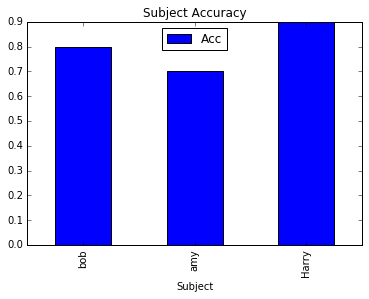

In [98]:
df.plot.bar(x='Subject', y='Acc', title='Subject Accuracy')

## Plotting Functions can Take advantage of the Index for more Intelligent Plotting

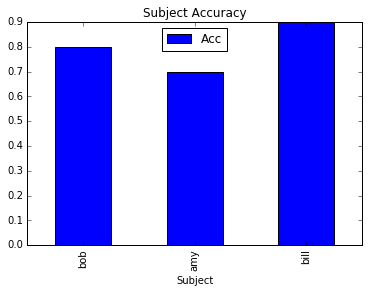

In [105]:
dfs.plot.bar(y='Acc', title='Subject Accuracy')

## Pandas Plotting uses Matplotlib, so all Matplotlib functions work with Pandas

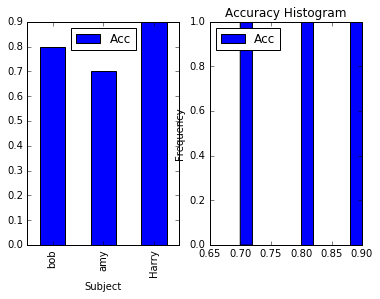

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df.plot.bar(x='Subject', y='Acc', ax=axes[0])
df.plot.hist(y='Acc', ax=axes[1])
axes[1].set_title('Accuracy Histogram')

# Saving DataFrame to File
Pandas provides many filetypes to save dataframes to.  Many of these functions are found as DataFrame methods starting with the word "to_"

In [107]:
print([fun for fun in dir(df) if 'to_' in fun[:3]])

['to_clipboard', 'to_csv', 'to_dense', 'to_dict', 'to_excel', 'to_gbq', 'to_hdf', 'to_html', 'to_json', 'to_latex', 'to_msgpack', 'to_panel', 'to_period', 'to_pickle', 'to_records', 'to_sparse', 'to_sql', 'to_stata', 'to_string', 'to_timestamp', 'to_wide', 'to_xarray']


# Data Exploration
Pandas' data organization features really come to life when we look at large mixed datasets.  In the following section, we'll explore some subject data taken from the MovieLens dataset, which recorded movie ratings from almost 1000 people.  http://grouplens.org/datasets/movielens/100k/

In [37]:
users = pd.read_csv('users.csv', delimiter='|')
users

,Num,Age,Sex,Job,ZipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


## head()
The **head()** method just returns the first N rows of the dataframe (5 by default).  This is convenient for a first pass of the data!

In [108]:
users.head(3)

,Num,Age,Sex,Job,ZipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


## describe()
describe() gives us some quick statistics on any given column as a series or dataframe. If called on the whole dataframe, it will only give the statistics on the numeric data

In [120]:
st = users['Job'].describe()
st

count         943
unique         21
top       student
freq          196
Name: Job, dtype: object

In [121]:
users.Sex.describe()

count     943
unique      2
top         M
freq      670
Name: Sex, dtype: object

## groupby()
Need to seperate your data?  Instead of putting it into seperate variables, you can use the groupby() feature to make a GroupBy iterator, which you can use in a for loop.  In addition, Pandas functions will often treat the GrouBy object in a nice way!

In [124]:
users.groupby('Sex').Age.describe(percentiles=[.5])

Sex       
F    count    273.000000
     mean      33.813187
     std       11.799095
     min       13.000000
     50%       32.000000
     max       70.000000
M    count    670.000000
     mean      34.149254
     std       12.356868
     min        7.000000
     50%       31.000000
     max       73.000000
Name: Age, dtype: float64

In [ ]:
for sex, data in users.groupby('Sex'):
    print(sex)
    print(data.head(2))  
    print('')

In [ ]:
 users.groupby('Sex').Age.hist(alpha=.4, bins=15)

In [ ]:
ages = users.groupby('Sex').Age
ages.mean().plot.bar(yerr=ages.std(), rot=0, title='Mean Subject Age by Sex')

In [ ]:
users.groupby('Job').count().Num.plot.bar(rot=70, title='Total Users by Job')

## Questions?

Note: We'll go into more advanced features of Pandas (time-series analysis, advanced grouping, hierarchical indexing) in future lectures.